# **Task 4**

**Unsupervised Learning**

In this task, we will explore data dimensionality reduction and different  clustering methods.

We will work with the **Samsung Human Activity Recognition dataset**. The data comes from the accelerometers and gyros of Samsung mobile phones, the type of activity of a person with a phone in his pocket is also known - whether he walked, stood, lay, sat or walked up or down the stairs.

We imagine that the type of activity is unknown to us (unlabelled), and we will try to cluster people purely on the basis of available features.

# **Imports and Data loading**

Import some basic modules like numpy, pandas, seaborn, tqdm_notebook & matplotlib.pyplot

In [1]:
# code here
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
%matplotlib inline

Mention the path of dataset, 4 paths for the 4 different txt files.

In [2]:
# Mention the path in the strings below
samsung_train_path = "../../samsung_train.txt"
samsung_train_labels_path = "samsung_train_labels.txt"

samsung_test_path = "samsung_test.txt"
samsung_test_labels_path = "samsung_test_labels.txt"

This time we will be using np.loadtxt() for reading our data. Code for the same has been given (do not modify), but we expect you to understand the working of it.

Ref.: https://www.geeksforgeeks.org/numpy-loadtxt-in-python/

In [3]:
# DO NOT MODIFY
X_train = np.loadtxt(samsung_train_path)
y_train = np.loadtxt(samsung_train_labels_path).astype(int)

X_test = np.loadtxt(samsung_test_path)
y_test = np.loadtxt(samsung_test_labels_path).astype(int)

Just to confirm that your data has been loaded properly, execute the below cell. You won't receive any error if everything is correct.

NOTE: If you get an Assertion error, then you probably did something wrong above.

In [4]:
# Checking dimensions
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

# **Pre-processing**

For clustering, we do not need a target vector, so we'll work with the combination of training and test samples. Merge *X_train* with *X_test*, and *y_train* with *y_test*.

Hint: 
1. Merge X_train and X_test into X {use [np.vstack()](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)}
2. Merge y_train and y_test into y {use [np.hstack()](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)}

In [5]:
# Uncomment the below lines and code
# Merge X_train and X_test into a single array X
X = np.vstack((X_train, X_test))

# Merge y_train and y_test into a single array y
y = np.hstack((y_train, y_test)) 

Using numpy, print the unique values of the labels of the target class (i.e. "y").

Ref.: https://www.geeksforgeeks.org/python-numpy-np-unique-method/


In [6]:
# code here
y_unique = np.unique(y)
print(y_unique)

[1 2 3 4 5 6]


Store the size (or number) of unique values of the labels of the target class (i.e. "y") in a variable named n_classes.

In [7]:
# Uncomment the below line and code
n_classes = len(y_unique)
print(n_classes)

6


Here the 6 labels (or classes) correspond to:
- 1 - walking
- 2 - going up the stairs
- 3 - going down the stairs
- 4 - sitting
- 5 - standing
- 6 - lying down

So we wish to create 6 clusters where each cluster can represent one of the above activities.

Scale the sample (i.e. X) using [`StandardScaler()`](https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python)

In [8]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
# initialize an instance of StandardScaler()
scaler = StandardScaler()
# use the above instance to fit_transform "X" and assign it into a new variable "X_scaled"
X_scaled = scaler.fit_transform(X)

# **Dimensionality Reduction using PCA**

Principal Component Analysis (PCA) is a dimensionality reduction technique and a fundamental tool in the field of data analysis and machine learning. It is used for various purposes because of its ability to extract valuable information from high-dimensional data by transforming it into a lower-dimensional representation. 

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer  = load_breast_cancer()

In [11]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [13]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [14]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [17]:
scaled_data = scaler.transform(df)

In [18]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [19]:
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA



Theory: https://towardsdatascience.com/dimensionality-reduction-explained-5ae45ae3058e

Theory + Implementation.: https://youtu.be/OFyyWcw2cyM (Jump to timestamp - 13:50 for PCA implementaion)

In [20]:
# code here
pca = PCA(n_components=2)

In [21]:
pca.fit(scaled_data)

PCA(n_components=2)

In [22]:
x_pca = pca.transform(scaled_data)

In [23]:
scaled_data.shape

(569, 30)

Let's check the shape of X_pca.

In [24]:
x_pca.shape

(569, 2)

# **K-Means (Partition based clustering)**

In [25]:
from sklearn.cluster import KMeans
import pandas as pd

In [26]:
data = {
    'x': [32, 12, 57, 42, 66, 8, 23, 50, 19, 37, 63, 55, 28, 15, 41, 71, 10, 5, 69],
    'y': [44, 60, 11, 3, 68, 38, 25, 7, 51, 35, 22, 59, 45, 2, 48, 31, 20, 17, 54]
}

df1 = pd.DataFrame(data)

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)

c:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
labels = kmeans.predict(df1)
centroids = kmeans.cluster_centers_

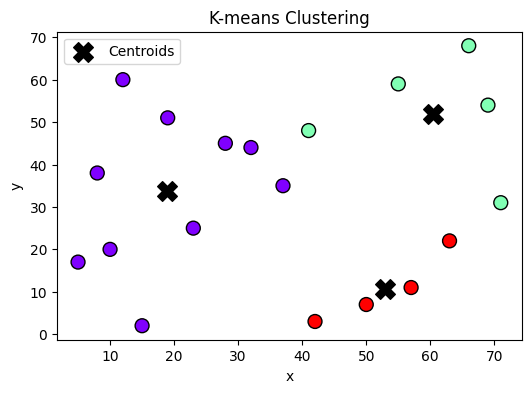

In [29]:
plt.figure(figsize=(6, 4))
plt.scatter(df1['x'], df1['y'], c=labels, cmap='rainbow', marker='o', edgecolor='k', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')
plt.legend()
plt.show()

Similar to classification and regression metrics, we have some [clustering metrics](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) to evaluate performance.

We wll explore one of them: [adjusted_rand_index (ARI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

# **Optional Task:**


**Only the below 4 cells are optional. Agglomerative Clustering is not optional.**

Find optimal value of n_clusters for our KMeans model using the elbow method.

So, let's use the elbow method to select the optimal number of clusters. Parameters of the algorithm and the data we use are the same as before, we change only `n_clusters`.

- Loop n_clusters from 1 to 7 and fit a KMeans model over X_pca each time.
- Calculate inertia for each KMeans model and append it to a list. (Hint: inertia_list.append(np.sqrt(model_name.inertia_)) ) 
- Plot a line graph of inertia_list vs n_clusters value
- The optimal n_clusters value is the point at which the graph changes it steepness drastically.
- If everything is correct, you will find optimal n_clusters value to be 2 using elbow method.

In [30]:
# code here

So we see that KMeans clustering does not work well for our dataset. So let's try Agglomerative Clustering.

# **Agglomerative (Heirarichal clustering)**

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [31]:
customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [32]:
customer_data.shape

(200, 5)

In [33]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
data = customer_data.iloc[:, 3:5].values

In [35]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

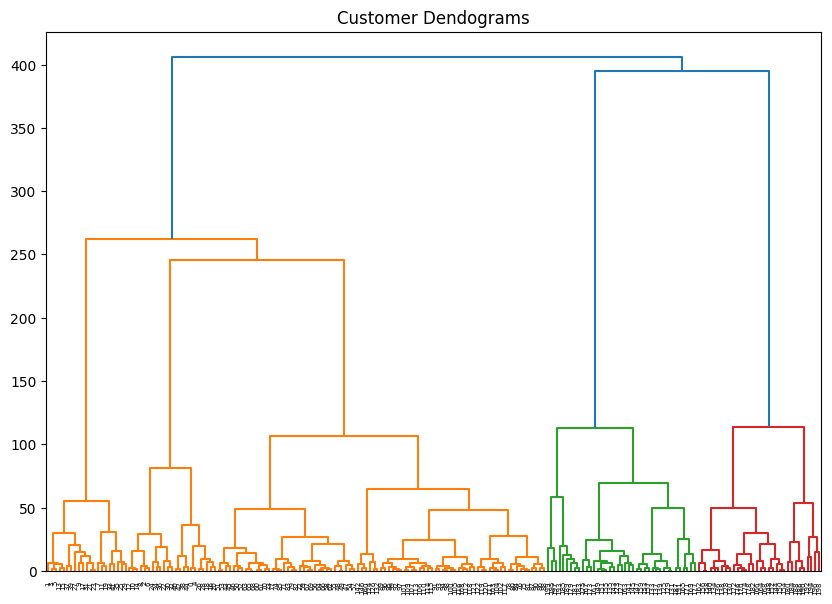

In [36]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [37]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(data)

c:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

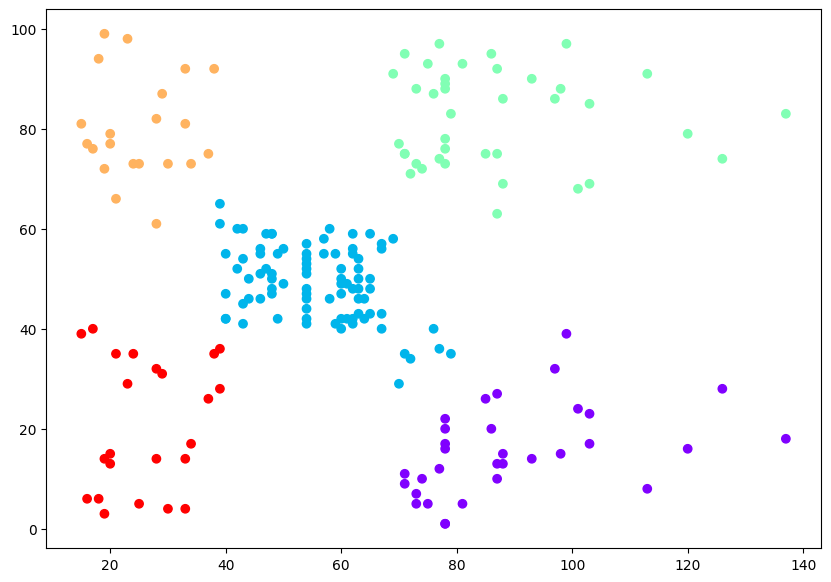

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

# **DBSCAN(Density-Based Spatial Clustering of Applications with Noise)**

Here's a description of the key components and steps of the DBSCAN algorithm:

Density-Based: DBSCAN is a density-based clustering algorithm, which means it defines clusters as areas in the data space where there is a high density of data points, separated by areas with lower density. The algorithm doesn't require the number of clusters to be specified in advance.

Core Points: In DBSCAN, a "core point" is a data point that has at least a specified number of neighboring data points within a certain distance. These are typically the data points that are at the core of a cluster.

Border Points: A "border point" is a data point that has fewer neighboring data points than required to be considered a core point but is within the neighborhood of a core point. Border points are considered part of the cluster, but they are not at the core.

Noise Points: Data points that are neither core points nor border points are classified as "noise points" or outliers. These are often isolated data points that don't belong to any cluster.

Steps of the DBSCAN Algorithm:

1.The algorithm starts by selecting an arbitrary data point that hasn't been visited yet and determining whether it's a core point based on the specified minimum number of neighbors (min_samples) and a maximum distance (eps) criterion.

2.If the point is a core point, a new cluster is created, and all reachable data points (including core points and border points) within distance eps are added to the cluster.

3.The process continues recursively, expanding the cluster by adding connected data points, until there are no more points to add.

4.The algorithm then selects another unvisited data point and repeats the process, creating additional clusters or labeling noise points.

5.This process continues until all data points have been visited and assigned to clusters or labeled as noise.

In [40]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [41]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

In [42]:
model=dbscan.fit(X)

In [43]:
labels=model.labels_

In [44]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True


In [45]:
#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)

In [46]:
print(metrics.silhouette_score(X,labels))

-0.1908319132560097


**Conclusion**

Compare ARI values of KMeans and Agglomerative Clustering. Mention below which one is better among the two. Also, specify reasons to support your claim

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **DB-SCAN Clustering Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**
